## Group 4

Binal Patel(202003035)

Vivek davara(202003009)

Hardik Jani(202003041)



In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 72.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 16.2 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

Measurement results:
{'001': 506, '000': 494}


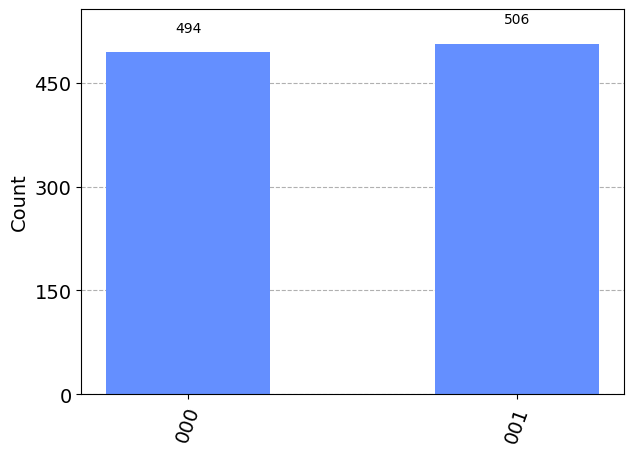

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

# Define the oracle function
def oracle_function(input_string):
    n = len(input_string)
    
    # Create a quantum circuit with n+1 qubits
    circuit = QuantumCircuit(n+1)
    
    # Apply the oracle function using controlled gates
    for i in range(n):
        if input_string[i] == '1':
            circuit.x(i)
    
    # Apply a controlled-X gate
    circuit.cx(0, n)
    
    # Reverse the controlled gates
    for i in range(n):
        if input_string[i] == '1':
            circuit.x(i)
    
    # Convert the circuit to a gate
    oracle_gate = circuit.to_gate()
    
    return oracle_gate


# Define the Hidden Subgroup Problem quantum algorithm
def hsp_algorithm(oracle):
    n = oracle.num_qubits - 1
    
    # Create a quantum circuit with n+1 qubits
    circuit = QuantumCircuit(n+1, n)
    
    # Apply Hadamard gates to the input qubits
    circuit.h(range(n))
    
    # Apply the oracle gate
    circuit.append(oracle, range(n+1))
    
    # Apply Hadamard gates to the input qubits
    circuit.h(range(n))
    
    # Measure the input qubits
    circuit.measure(range(n), range(n))
    
    return circuit


# Example usage
input_string = '000'

# Create the oracle gate
oracle = oracle_function(input_string)

# Create the Hidden Subgroup Problem circuit
hsp_circuit = hsp_algorithm(oracle)

# Run the circuit on a simulator
backend = Aer.get_backend('qasm_simulator')
job = execute(hsp_circuit, backend, shots=1000)
result = job.result()
counts = result.get_counts()

# Print the measurement results
print("Measurement results:")
print(counts)

# Plot a histogram of the results
plot_histogram(counts)